# Explore preprocessed Kickstarter data

* plot basic relations, distributions, etc.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
target_path = '../data/interim/kickstarter_csvs'
filename = 'kick_id.csv'

In [3]:
datecols = ['created_at', 'deadline', 'state_changed_at', 'launched_at']

In [4]:
fdatpars = lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

In [5]:
df = pd.read_csv(os.path.join(target_path, filename), index_col='id', parse_dates=datecols, date_parser=fdatpars)

In [6]:
df.head(3)

,name,goal,pledged,usd_pledged,state,slug,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,blurb,spotlight,category
id,,,,,,,,,,,,,,,,,,
18520,Grandma's are Life,15000.0,62.0,62.000000,failed,grandmas-are-life,False,US,USD,2016-11-18 09:32:40,2016-11-18 09:32:40,2016-10-19 08:13:18,2016-10-19 09:32:40,False,4,Raising money to help my grandmother recover f...,False,music/world music
21109,Meta,150.0,173.0,258.036032,successful,meta,False,GB,GBP,2015-05-06 17:00:00,2015-05-06 17:00:12,2015-04-07 10:07:05,2015-04-07 18:37:44,False,11,My work is performance based but I branch out ...,True,art/performance art
24380,Puss N' Books: A relaxing cat cafe and bookstore.,20000.0,776.0,776.000000,failed,puss-n-books-a-relaxing-cat-cafe-and-bookstore,False,US,USD,2015-11-26 11:25:33,2015-11-26 11:25:33,2015-10-25 11:32:25,2015-10-27 11:25:33,False,18,A sanctuary for humans and felines alike! Come...,False,food/spaces


In [7]:
df.dtypes

name                             object
goal                            float64
pledged                         float64
usd_pledged                     float64
state                            object
slug                             object
disable_communication              bool
country                          object
currency                         object
deadline                 datetime64[ns]
state_changed_at         datetime64[ns]
created_at               datetime64[ns]
launched_at              datetime64[ns]
staff_pick                         bool
backers_count                     int64
blurb                            object
spotlight                          bool
category                         object
dtype: object

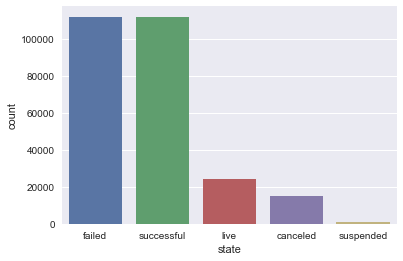

In [8]:
sns.countplot(x='state', data=df)

In [9]:
from collections import Counter
Counter(df['state'])

Counter({'canceled': 15021,
         'failed': 111621,
         'live': 24357,
         'successful': 111814,
         'suspended': 952})

* About half the projects were successful (the funding process)
* This does not seem to match the info I got before (~34%) - why?
* I may have deleted resubmittals during preprocessing ??? - not likely, but look into it

## Goals vs. pledged

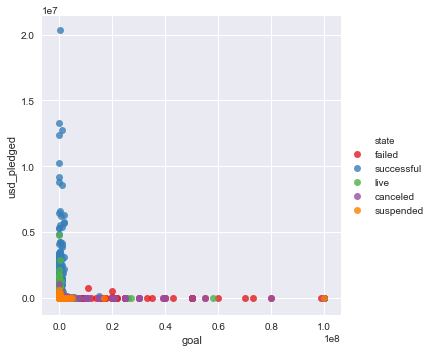

In [10]:
sns.lmplot(x='goal', y='usd_pledged', hue='state', data=df, fit_reg=False, palette='Set1')

(0, 3000000.0)

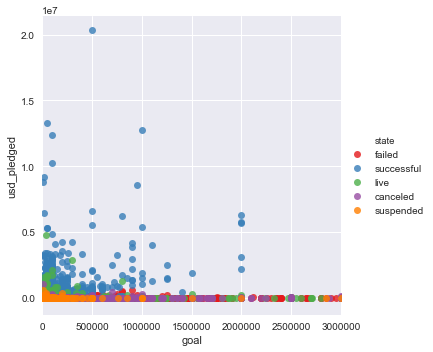

In [11]:
sns.lmplot(x='goal', y='usd_pledged', hue='state', data=df, fit_reg=False, palette='Set1')
plt.xlim(0,0.3e7)

* There seems to be inverse relationship between the goal and amount pledged
* Successful funding campain should be easier with lower target, but asking less also helps to get more money
* Lowballing a good strategy?
    * May get staff endorsment
    * Better perception of achievability
    * Large funding goals scare people away
    * Large funding goals may be correlate with poor planning or crackpot ideas?

## Staff picks - are they any good?

In [12]:
Counter(df['staff_pick'])

Counter({False: 234750, True: 29015})

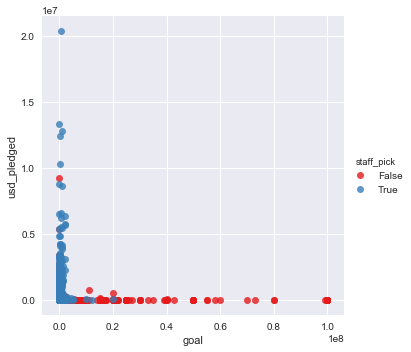

In [13]:
sns.lmplot(x='goal', y='usd_pledged', hue='staff_pick', data=df, fit_reg=False, palette='Set1')

* Staff picks are usually a good predictor of success
* A few outliers, when they missed
* Any time the staff picked higher goal (above 0.1e8) they missed.
* Better stick to small goals
* Is the staff_pick info redundant (use just the goal)?

## Countries comparison - how many projects, how much they ask and get

In [14]:
import operator
sorted(Counter(df['country']).items(), key=operator.itemgetter(1), reverse=True)

[('US', 203618),
 ('GB', 23662),
 ('CA', 10583),
 ('AU', 5637),
 ('DE', 3140),
 ('FR', 2332),
 ('IT', 2248),
 ('NL', 2081),
 ('ES', 1837),
 ('MX', 1518),
 ('SE', 1340),
 ('NZ', 1047),
 ('DK', 866),
 ('IE', 616),
 ('CH', 602),
 ('HK', 578),
 ('NO', 542),
 ('BE', 497),
 ('SG', 455),
 ('AT', 445),
 ('JP', 77),
 ('LU', 44)]

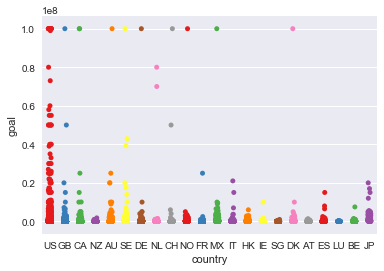

In [15]:
sns.stripplot(x='country', y='goal', data=df, palette='Set1', jitter=True)

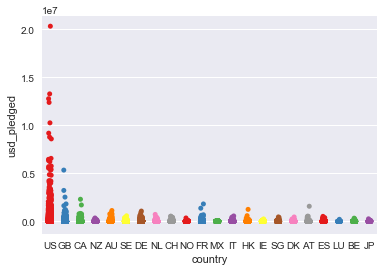

In [16]:
sns.stripplot(x='country', y='usd_pledged', data=df, palette='Set1', jitter=True)

(0, 1000000.0)

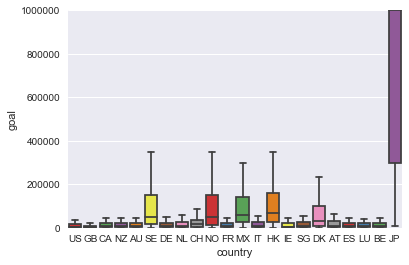

In [17]:
sns.boxplot(x='country', y='goal', data=df, palette='Set1', fliersize=0)
plt.ylim(0,1e6)

(0, 20000.0)

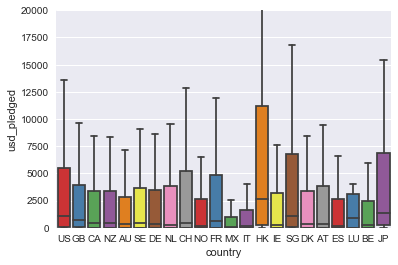

In [18]:
sns.boxplot(x='country', y='usd_pledged', data=df, palette='Set1', fliersize=0)
plt.ylim(0,2e4)

* 22 countries 
* Hong Kong asks a lot and gets a lot
* Japanese ask the most, get good funding (could there be some currency mess-up with Japanese Yen?)
* Mexicans ask a lot, get the least
* Americans don't ask much, but still are funded well

## What is 'disable_communication'? 

In [19]:
Counter(df['disable_communication'])

Counter({False: 262813, True: 952})

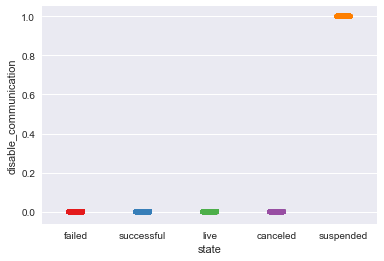

In [20]:
sns.stripplot(y='disable_communication', x='state', data=df, palette='Set1', jitter=True)

* It just happens when a project is suspended